link dataset: https://www.kaggle.com/datasets/sid4sal/alpaca-dataset-small

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
IMG_PATH = "dataset"
img_datagen = ImageDataGenerator(
    rotation_range = 0.45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [4]:
img_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size = (150,150),
    batch_size = 32
)

Found 327 images belonging to 2 classes.


In [5]:
img_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    validation_split = 0.1
)

train_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size = (150,150),
    batch_size = 32,
    subset = 'training',
    class_mode = 'binary'
)

val_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size = (150,150),
    batch_size = 32,
    subset = 'validation',
    class_mode = 'binary'
)

test_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 295 images belonging to 2 classes.
Found 32 images belonging to 2 classes.
Found 327 images belonging to 2 classes.


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=[150, 150, 3]), #inputshape ngikuti target_size

    # hidden layer
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),

    # dense layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = 10
)

Epoch 1/10
10/10 [==============================] - 113s 8s/step - loss: 2.9456 - accuracy: 0.5220 - val_loss: 0.7860 - val_accuracy: 0.3125
Epoch 2/10
10/10 [==============================] - 25s 3s/step - loss: 0.7576 - accuracy: 0.5458 - val_loss: 0.6648 - val_accuracy: 0.5625
Epoch 3/10
10/10 [==============================] - 26s 3s/step - loss: 0.6503 - accuracy: 0.6576 - val_loss: 0.6395 - val_accuracy: 0.6562
Epoch 4/10
10/10 [==============================] - 26s 3s/step - loss: 0.6426 - accuracy: 0.6169 - val_loss: 0.5915 - val_accuracy: 0.7188
Epoch 5/10
10/10 [==============================] - 25s 2s/step - loss: 0.5796 - accuracy: 0.7322 - val_loss: 0.5702 - val_accuracy: 0.6250
Epoch 6/10
10/10 [==============================] - 27s 3s/step - loss: 0.7456 - accuracy: 0.6034 - val_loss: 0.8463 - val_accuracy: 0.5312
Epoch 7/10
10/10 [==============================] - 27s 3s/step - loss: 0.5765 - accuracy: 0.6915 - val_loss: 0.5260 - val_accuracy: 0.7188
Epoch 8/10
10/10 [=

In [12]:
model.evaluate(val_generator)

1/1 [==============================] - 1s 970ms/step - loss: 0.5161 - accuracy: 0.6562


[0.5160632729530334, 0.65625]

Text(0, 0.5, 'loss')

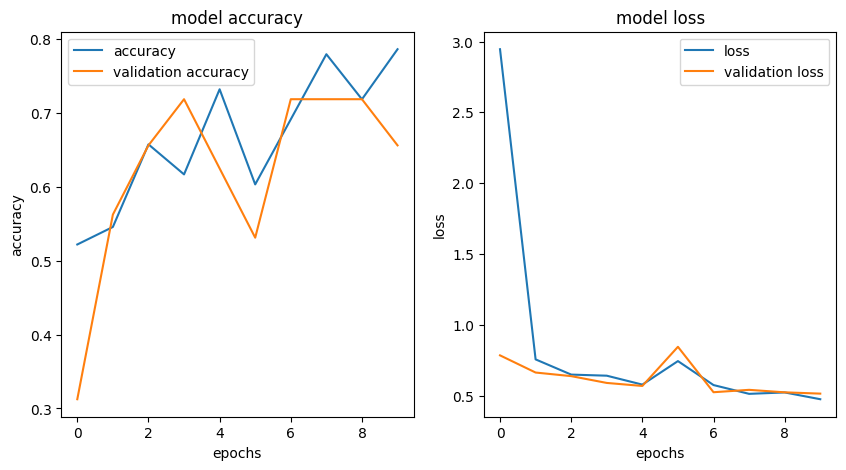

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.title("model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")